# 🔬 Análise de Clusterização - Espessura Epitelial

## Atividade 4: Descoberta de Perfis/Padrões de Olhos

---

### 📋 Objetivo

Utilizar **aprendizado não-supervisionado (K-Means)** para descobrir perfis/padrões de espessura epitelial em mapas oculares.

### 📊 Dataset

- **Arquivo**: `RTVue_20221110_MLClass.csv`
- **Features**: 9 regiões de espessura epitelial (C, S, ST, T, IT, I, IN, N, SN)
- **Objetivo**: Identificar grupos naturais de olhos com características similares

### 🎯 Metodologia

1. **Exploração dos Dados**
2. **Otimização do Número de Clusters (K)**
3. **Clusterização com K-Means**
4. **Análise dos Perfis Encontrados**
5. **Apresentação dos Resultados**

---

## 1️⃣ Importação de Bibliotecas e Módulos

Importando as bibliotecas necessárias e os módulos customizados com as funções técnicas.

In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Módulos customizados (funções técnicas)
from kmeans_clustering import KMeansEpithelialClusterer
from optimization import KOptimizer
from presentation import ClientPresentation

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Configuração de visualização
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("✅ Bibliotecas e módulos importados com sucesso!")

✅ Bibliotecas e módulos importados com sucesso!


## 2️⃣ Carregamento e Exploração dos Dados

Vamos carregar o dataset de espessura epitelial e explorar suas características.

In [2]:
# Caminho do dataset
data_path = Path("data/RTVue_20221110_MLClass.csv")

# Carrega dados
df = pd.read_csv(data_path)

# Informações básicas
print("="*60)
print("INFORMAÇÕES DO DATASET")
print("="*60)
print(f"\n📊 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\n📋 Colunas disponíveis:")
print(df.columns.tolist())
print(f"\n❓ Valores ausentes por coluna:")
print(df.isnull().sum())
print(f"\n📈 Primeiras linhas:")
df.head(10)

INFORMAÇÕES DO DATASET

📊 Dimensões: 5972 linhas x 14 colunas

📋 Colunas disponíveis:
['Index', 'pID', 'Age', 'Gender', 'Eye', 'C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']

❓ Valores ausentes por coluna:
Index       0
pID         0
Age         0
Gender      0
Eye         0
C         314
S         122
ST        131
T         141
IT        143
I         165
IN        134
N         128
SN        122
dtype: int64

📈 Primeiras linhas:


,Index,pID,Age,Gender,Eye,C,S,ST,T,IT,I,IN,N,SN
0,0,6269,22,F,OS,50.0,56.0,60.0,71.0,57.0,54.0,52.0,52.0,51.0
1,2,6270,33,F,OS,56.0,55.0,54.0,54.0,55.0,56.0,56.0,55.0,55.0
2,4,6274,34,F,OS,58.0,69.0,55.0,57.0,67.0,72.0,66.0,59.0,64.0
3,7,6277,12,M,OS,47.0,52.0,52.0,47.0,46.0,48.0,55.0,56.0,53.0
4,9,6278,25,M,OS,53.0,52.0,51.0,52.0,54.0,55.0,54.0,53.0,53.0
5,10,6280,32,M,OS,56.0,57.0,60.0,62.0,68.0,58.0,53.0,57.0,58.0
6,12,6281,76,F,OS,57.0,50.0,51.0,54.0,58.0,58.0,53.0,51.0,49.0
7,14,6282,36,F,OS,50.0,49.0,49.0,49.0,51.0,52.0,51.0,51.0,51.0
8,15,6283,18,F,OS,52.0,54.0,54.0,46.0,44.0,52.0,56.0,54.0,54.0
9,18,6284,24,M,OS,51.0,61.0,61.0,47.0,42.0,51.0,62.0,65.0,63.0


In [3]:
# Estatísticas descritivas das features de espessura
features = ['C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']
print("📊 Estatísticas Descritivas das Regiões de Espessura Epitelial (μm):\n")
df[features].describe()

📊 Estatísticas Descritivas das Regiões de Espessura Epitelial (μm):



,C,S,ST,T,IT,I,IN,N,SN
count,5658.000000,5850.000000,5841.000000,5831.000000,5829.000000,5807.000000,5838.000000,5844.000000,5850.000000
mean,53.005479,55.028205,52.701079,52.283656,53.673357,54.221457,54.256423,54.141513,53.718803
std,19.869972,134.803161,16.773767,16.823118,65.371721,24.090966,20.568430,33.434342,51.244372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,49.000000,49.000000,48.000000,49.000000,50.000000,51.000000,50.000000,50.000000
50%,53.000000,52.000000,52.000000,52.000000,52.000000,54.000000,54.000000,54.000000,53.000000
75%,56.000000,57.000000,56.000000,56.000000,57.000000,58.000000,58.000000,57.000000,57.000000
max,770.000000,7318.000000,739.000000,776.000000,4848.000000,849.000000,893.000000,2310.000000,3801.000000


### 📈 Visualização Exploratória dos Dados

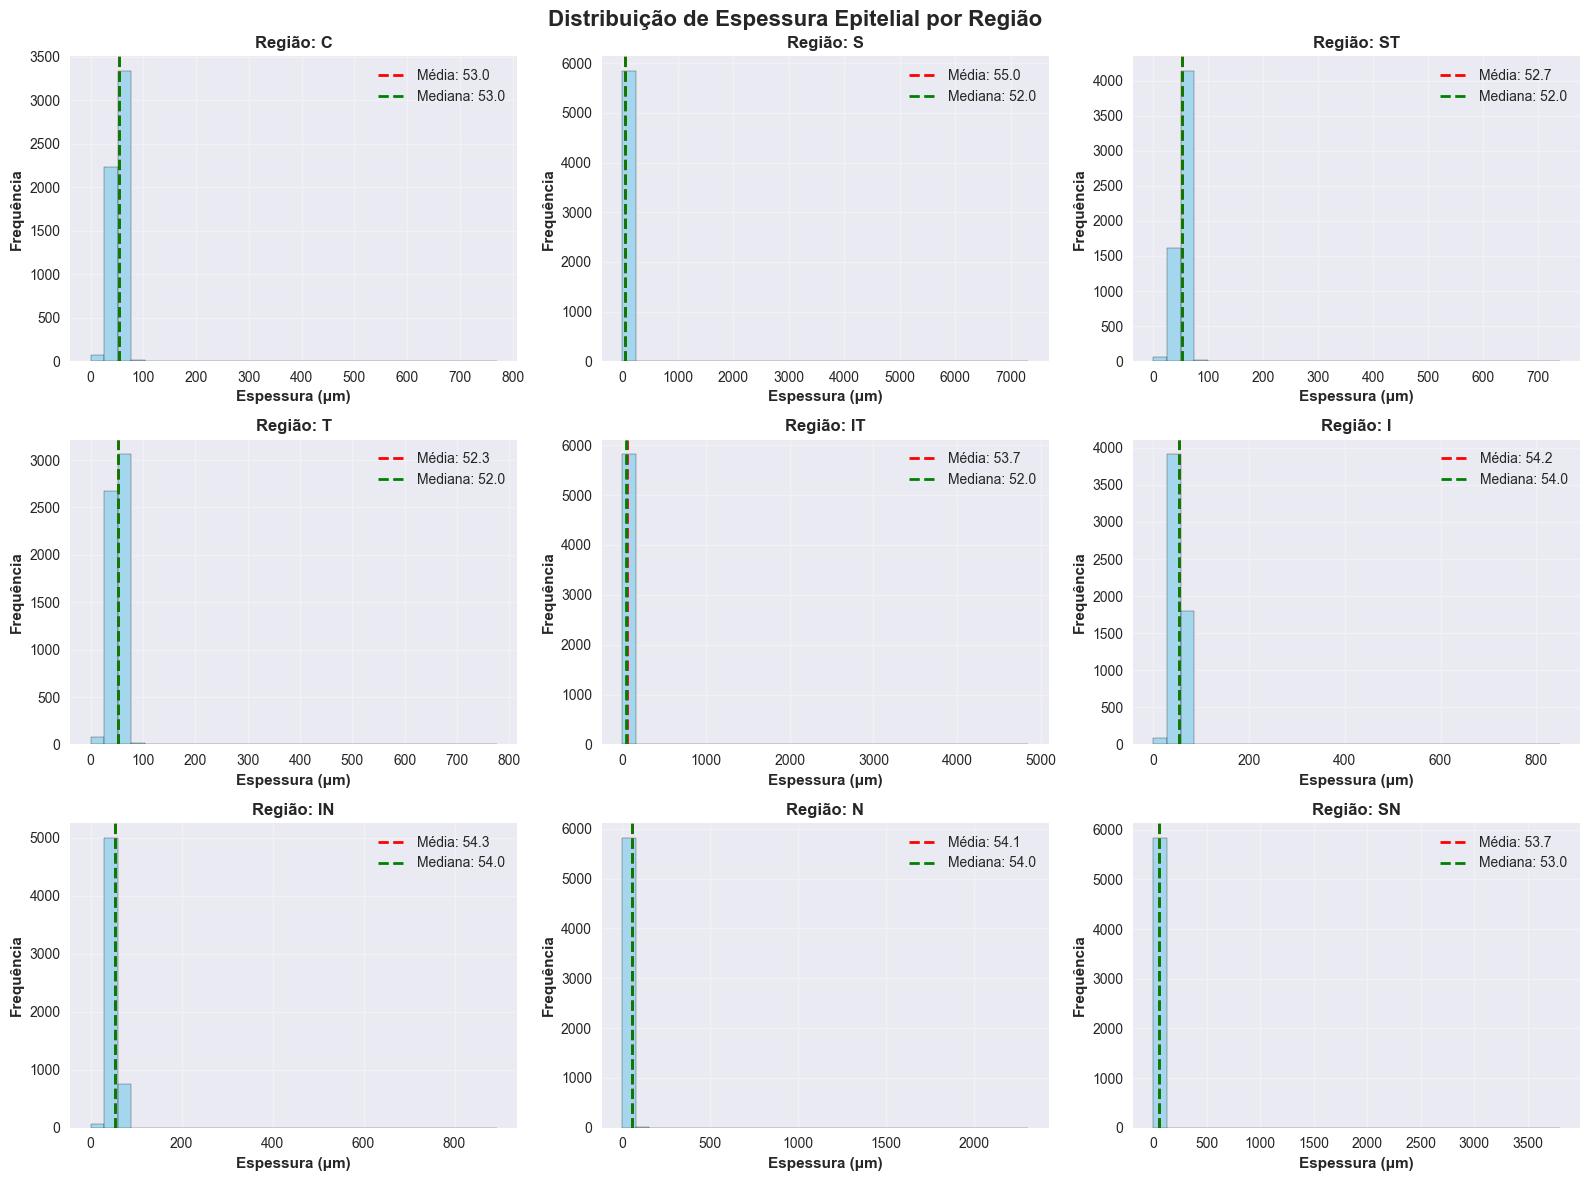

In [4]:
# Distribuição das espessuras por região
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Distribuição de Espessura Epitelial por Região', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    
    # Remove NaN para visualização
    data_clean = df[feature].dropna()
    
    ax.hist(data_clean, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.axvline(data_clean.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {data_clean.mean():.1f}')
    ax.axvline(data_clean.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {data_clean.median():.1f}')
    
    ax.set_xlabel('Espessura (μm)', fontweight='bold')
    ax.set_ylabel('Frequência', fontweight='bold')
    ax.set_title(f'Região: {feature}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

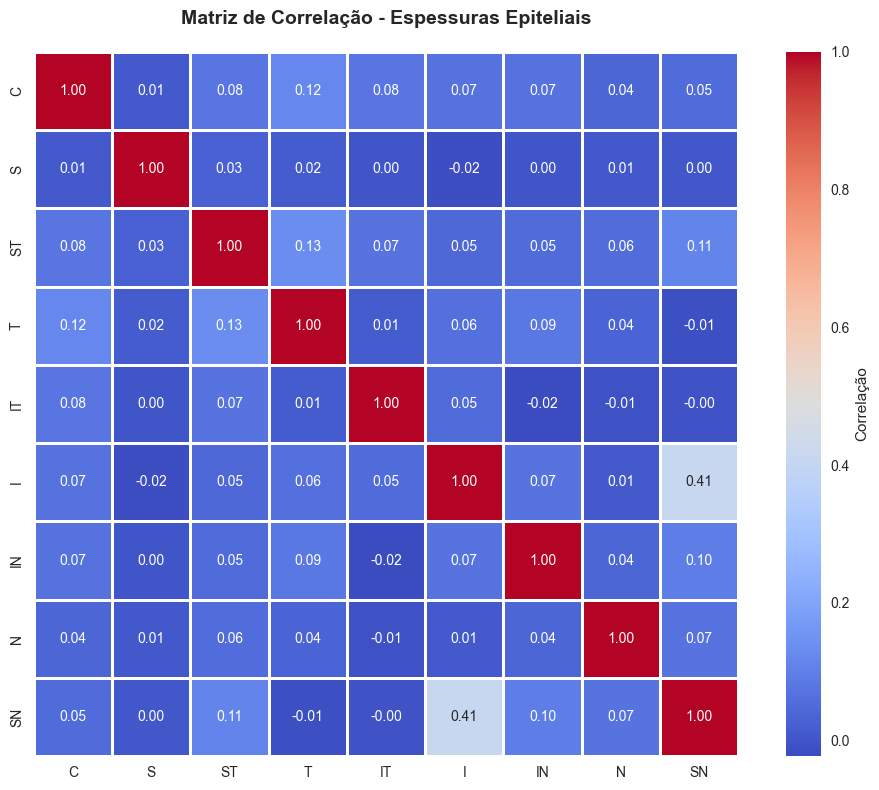


💡 Interpretação: Valores próximos de 1 indicam forte correlação positiva entre regiões.


In [5]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação - Espessuras Epiteliais', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interpretação: Valores próximos de 1 indicam forte correlação positiva entre regiões.")

## 3️⃣ Otimização do Número de Clusters

Utilizando a classe `KOptimizer` para determinar o número ótimo de clusters (K).

OTIMIZAÇÃO DO NÚMERO DE CLUSTERS (K)
Dados carregados: 5972 amostras, 14 características
Valores ausentes por coluna:
Index       0
pID         0
Age         0
Gender      0
Eye         0
C         314
S         122
ST        131
T         141
IT        143
I         165
IN        134
N         128
SN        122
dtype: int64

Linhas antes de remover NaN: 5972
Linhas após remover NaN: 5287

Dados preprocessados e normalizados
Características utilizadas: ['C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']
Estatísticas descritivas:
                 C            S           ST            T           IT  \
count  5287.000000  5287.000000  5287.000000  5287.000000  5287.000000   
mean     52.995839    55.472669    52.634765    52.590694    53.185549   
std      17.542230   141.615876     8.295545    13.581276    17.509237   
min       0.000000     0.000000     2.000000     0.000000     0.000000   
25%      49.000000    49.000000    49.000000    49.000000    49.000000   
50%      53.000000    5

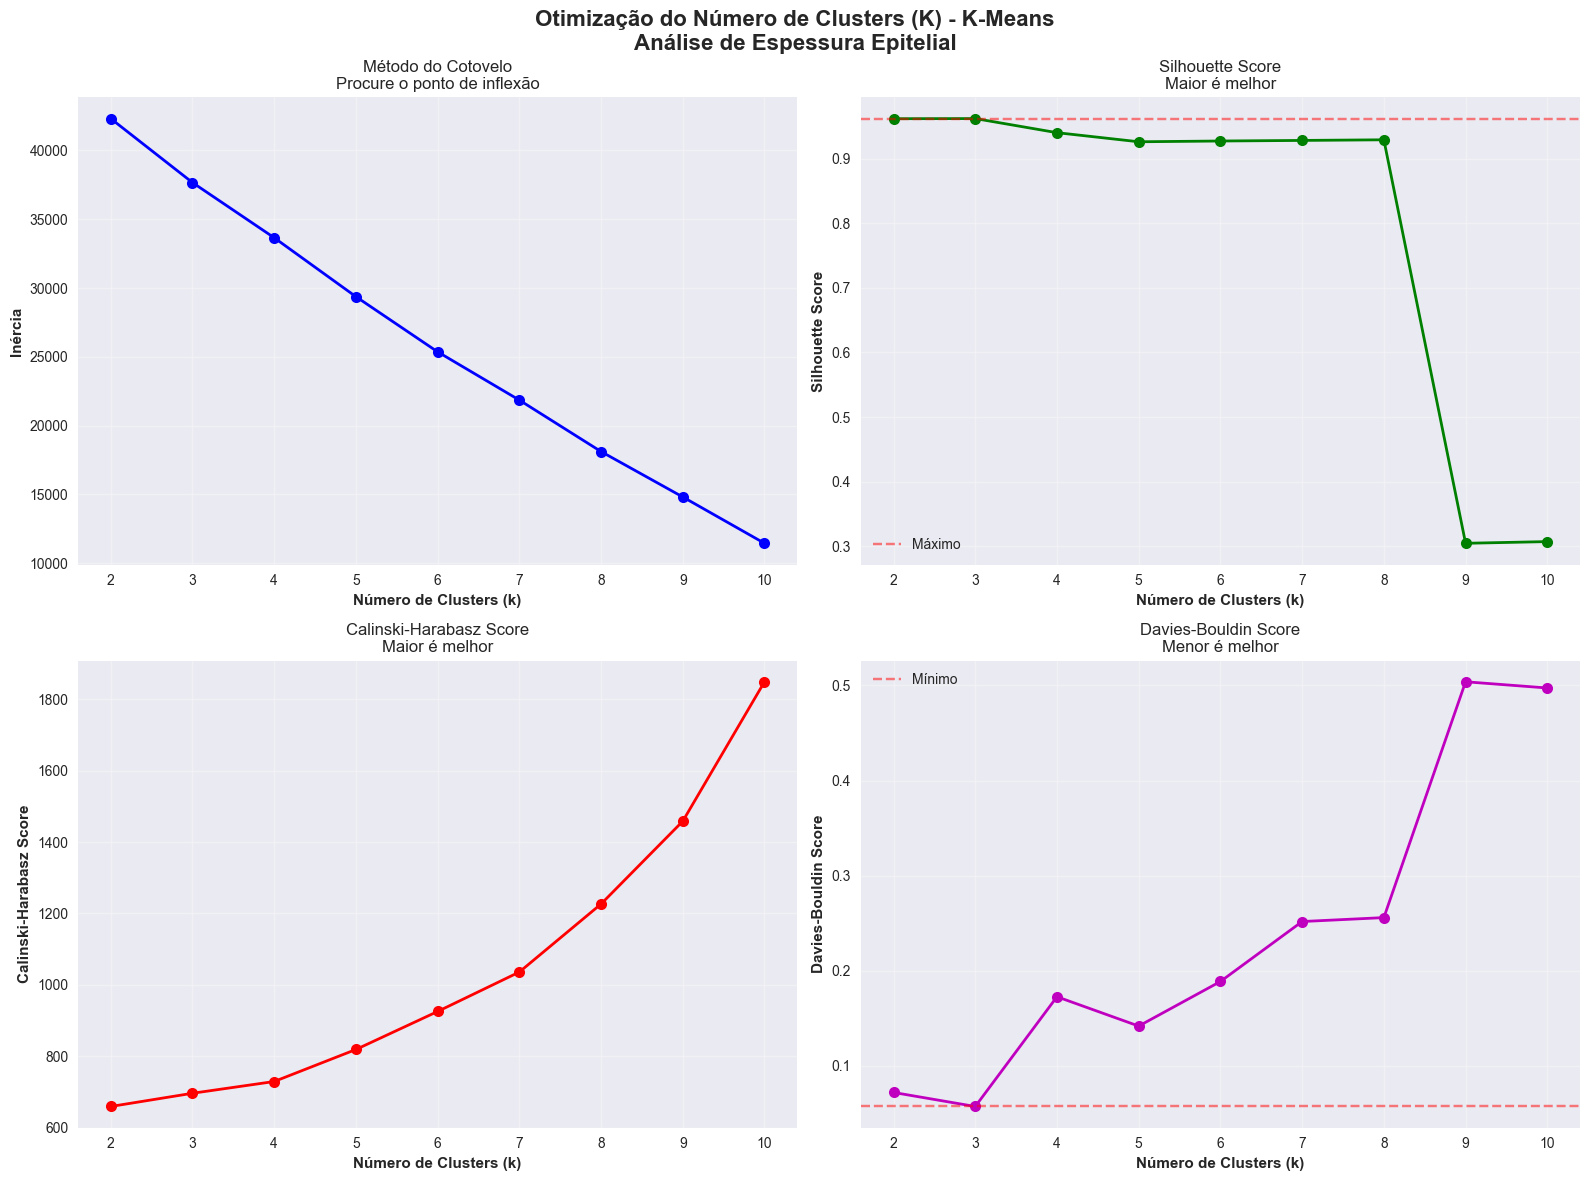

In [6]:
# Inicializa o otimizador
optimizer = KOptimizer(data_path)

# Analisa o número ótimo de clusters (testando de 2 a 10)
metrics_df = optimizer.analyze_optimal_k(max_k=10)

In [7]:
# Visualiza tabela de métricas
print("📊 Tabela de Métricas por Número de Clusters:\n")
metrics_df

📊 Tabela de Métricas por Número de Clusters:



,n_clusters,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,42307.575679,0.961768,658.998231,0.072104
1,3,37661.096473,0.961969,696.041050,0.057355
2,4,33652.781326,0.940139,728.947627,0.172705
3,5,29372.641405,0.926068,818.679471,0.141885
4,6,25364.374293,0.927252,925.207624,0.188742
5,7,21857.303126,0.928146,1035.745953,0.251771
6,8,18118.690902,0.929118,1226.374376,0.255912
7,9,14820.894189,0.304693,1458.405207,0.503805
8,10,11455.756438,0.307303,1849.081462,0.497269


### 🎯 Decisão do Número de Clusters

Com base nas métricas acima, vamos escolher o número de clusters para a análise.

In [8]:
# Escolha do número de clusters
# Ajuste este valor com base na análise das métricas
K_OPTIMAL = 8

print(f"✅ Número de clusters escolhido: K = {K_OPTIMAL}")
print(f"\n📊 Métricas para K={K_OPTIMAL}:")
print(metrics_df[metrics_df['n_clusters'] == K_OPTIMAL].T)

✅ Número de clusters escolhido: K = 8

📊 Métricas para K=8:
                              6
n_clusters             8.000000
inertia            18118.690902
silhouette             0.929118
calinski_harabasz   1226.374376
davies_bouldin         0.255912


## 4️⃣ Clusterização com K-Means

Aplicando o algoritmo K-Means com o número de clusters escolhido.

In [9]:
# Inicializa o clusterer
clusterer = KMeansEpithelialClusterer(n_clusters=K_OPTIMAL, random_state=42)

# Carrega e preprocessa dados
clusterer.load_data(data_path)
clusterer.preprocess_data()

# Treina o modelo
clusterer.fit()

# Obtém perfis dos clusters
cluster_stats, cluster_counts = clusterer.get_cluster_profiles()

Dados carregados: 5972 amostras, 14 características
Valores ausentes por coluna:
Index       0
pID         0
Age         0
Gender      0
Eye         0
C         314
S         122
ST        131
T         141
IT        143
I         165
IN        134
N         128
SN        122
dtype: int64

Linhas antes de remover NaN: 5972
Linhas após remover NaN: 5287

Dados preprocessados e normalizados
Características utilizadas: ['C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']
Estatísticas descritivas:
                 C            S           ST            T           IT  \
count  5287.000000  5287.000000  5287.000000  5287.000000  5287.000000   
mean     52.995839    55.472669    52.634765    52.590694    53.185549   
std      17.542230   141.615876     8.295545    13.581276    17.509237   
min       0.000000     0.000000     2.000000     0.000000     0.000000   
25%      49.000000    49.000000    49.000000    49.000000    49.000000   
50%      53.000000    52.000000    52.000000    52.000000   

### 📊 Perfis dos Clusters Encontrados

In [10]:
# Tabela de médias por cluster
print("📈 Espessura Média (μm) por Região e Cluster:\n")
means_table = cluster_stats.xs('mean', level=1, axis=1)
means_table.style.background_gradient(cmap='YlOrRd', axis=1)

📈 Espessura Média (μm) por Região e Cluster:



,C,S,ST,T,IT,I,IN,N,SN
Cluster,,,,,,,,,
0,52.578187,52.730952,52.621889,52.586928,52.612578,53.931218,53.982519,53.855026,52.961809
1,58.000000,7318.000000,66.500000,57.500000,53.500000,28.500000,47.500000,59.000000,60.500000
2,61.000000,62.000000,59.000000,51.000000,53.000000,59.000000,33.000000,2310.000000,68.000000
3,54.142857,55.000000,55.428571,53.142857,485.000000,50.714286,53.571429,53.857143,54.571429
4,609.000000,50.750000,54.250000,55.250000,56.750000,56.000000,58.250000,55.250000,54.250000
5,50.750000,49.250000,48.000000,50.750000,48.500000,51.500000,483.500000,49.500000,49.500000
6,37.666667,37.333333,58.333333,52.666667,52.333333,47.000000,59.333333,54.333333,471.000000
7,54.000000,55.333333,55.666667,54.000000,53.000000,616.666667,56.666667,52.000000,52.333333


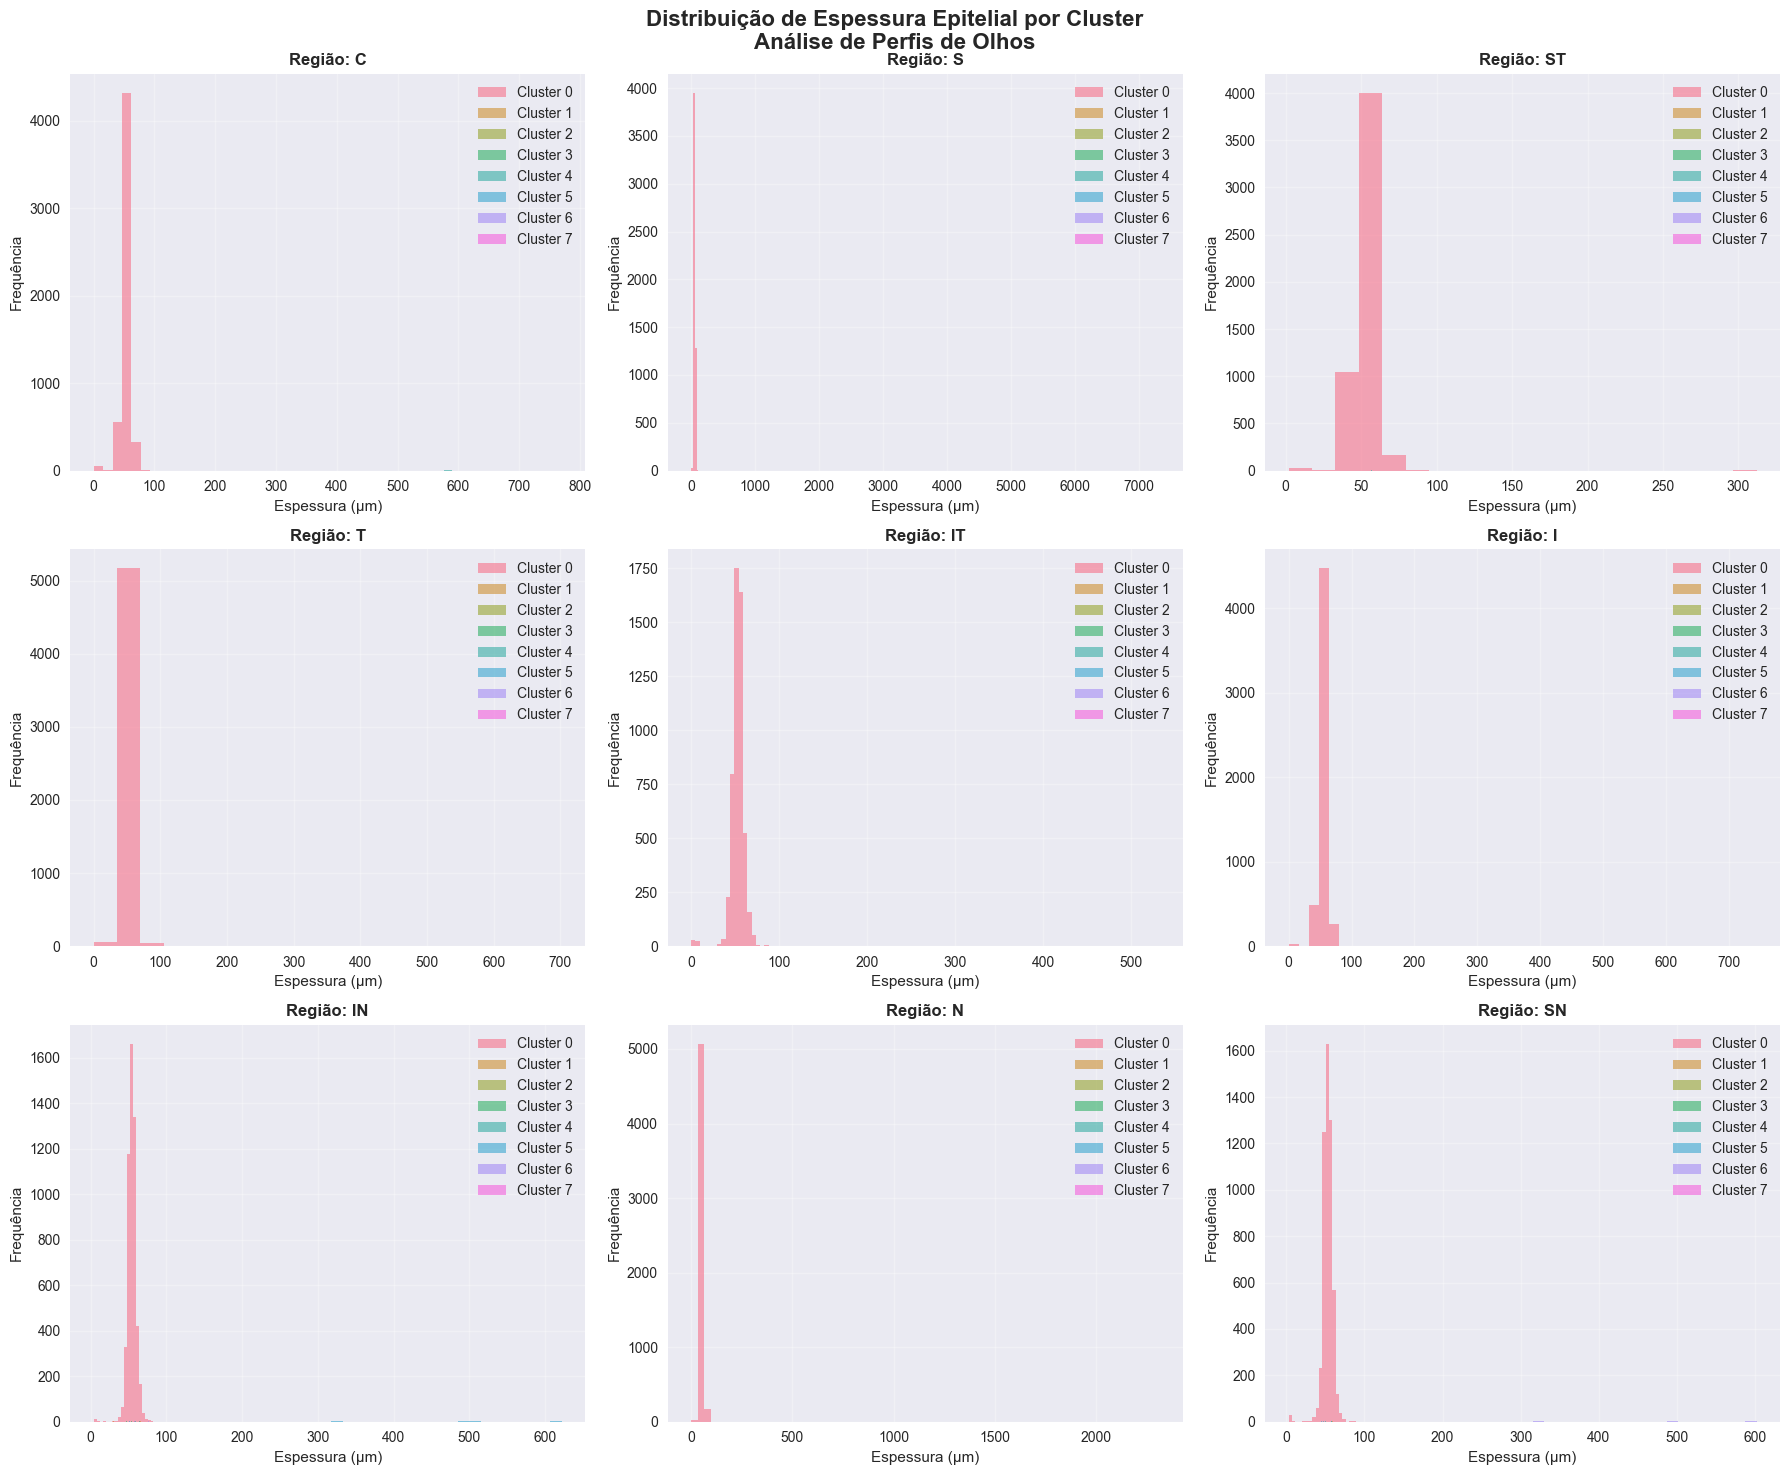

In [11]:
# Visualiza distribuições por cluster usando a função do módulo
clusterer.visualize_clusters()


📈 Distribuição de amostras por cluster:
  Cluster 0: 5263 amostras (99.5%)
  Cluster 1: 2 amostras (0.0%)
  Cluster 2: 1 amostras (0.0%)
  Cluster 3: 7 amostras (0.1%)
  Cluster 4: 4 amostras (0.1%)
  Cluster 5: 4 amostras (0.1%)
  Cluster 6: 3 amostras (0.1%)
  Cluster 7: 3 amostras (0.1%)


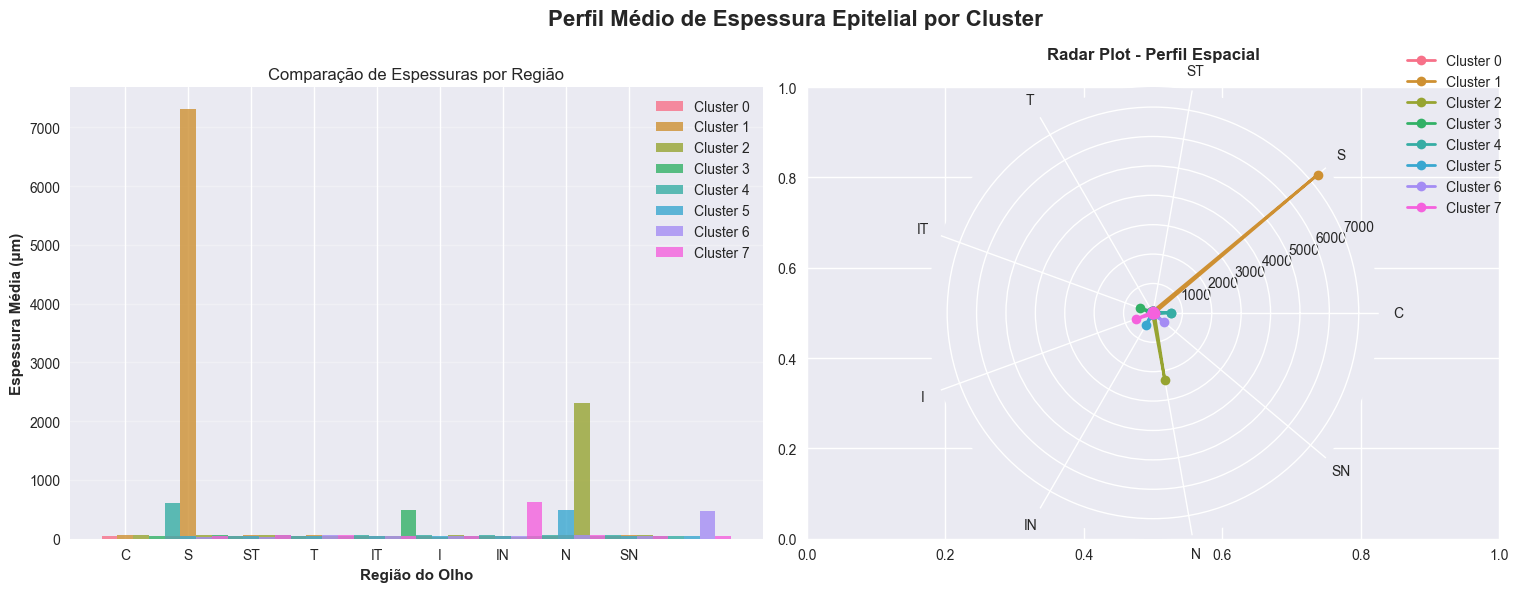

In [12]:
# Visualiza perfis médios por cluster
clusterer.visualize_cluster_means()

## 5️⃣ Apresentação para o Cliente

Gerando visualizações profissionais para apresentação ao cliente usando a classe `ClientPresentation`.

In [13]:
# Inicializa apresentação
presentation = ClientPresentation(n_clusters=K_OPTIMAL)
presentation.setup_and_train(data_path)

PREPARANDO APRESENTAÇÃO PARA O CLIENTE
Dados carregados: 5972 amostras, 14 características
Valores ausentes por coluna:
Index       0
pID         0
Age         0
Gender      0
Eye         0
C         314
S         122
ST        131
T         141
IT        143
I         165
IN        134
N         128
SN        122
dtype: int64

Linhas antes de remover NaN: 5972
Linhas após remover NaN: 5287

Dados preprocessados e normalizados
Características utilizadas: ['C', 'S', 'ST', 'T', 'IT', 'I', 'IN', 'N', 'SN']
Estatísticas descritivas:
                 C            S           ST            T           IT  \
count  5287.000000  5287.000000  5287.000000  5287.000000  5287.000000   
mean     52.995839    55.472669    52.634765    52.590694    53.185549   
std      17.542230   141.615876     8.295545    13.581276    17.509237   
min       0.000000     0.000000     2.000000     0.000000     0.000000   
25%      49.000000    49.000000    49.000000    49.000000    49.000000   
50%      53.000000   

## 6️⃣ Salvando Resultados

Exportando os resultados para arquivo CSV.

In [ ]:
# Cria diretório de resultados
results_path = Path("results")
results_path.mkdir(exist_ok=True)

# Salva resultados em CSV
output_file = results_path / "kmeans_results.csv"
clusterer.save_results(output_file)

# Salva métricas de otimização
metrics_file = results_path / "k_optimization_metrics.csv"
metrics_df.to_csv(metrics_file, index=False)
print(f"💾 Métricas de otimização salvas em: {metrics_file}")

print("\n" + "="*60)
print("✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
print("="*60)
print(f"\n📁 Todos os resultados foram salvos em: {results_path.absolute()}")